## Convolutional Neural Network (CNN)
For large color images fully connected neural networks(FCNN) are not efficient and give a low accuracy. This is becuase the FCNN is very good at identifying the non-linear relationship between the weights and biases but cannot identify regions of interest(ROI). A new convolutional layer is added to find the ROI (automatic feature extraction). Then the output of convolution is given to FCNN to identify the category. It is series of convolution and pooling layers before the FCNN, convolution and polling decrease the size of image but converts one image into multiple small images.

In convolution we take a image filter(a small size matrix) apply and run the filter over the image using a small fixed step size called stride, by going from left to right and top to bottom. Applying the filter here means doing element wise multiplication and adding them. Applying once results in one value, then move the filter to the right by the taken stride and apply again. Doing this over the entire image from left to right and top to bottom, results in a convoluted feature(matrix) smaller than the original image.Most of the time this is a smaller gray scale image.The matrix size of the filter and stride are hyper parameters. The filter values are learned like weights and biases. For filter size start with 3X3 then tune, for slide take a small size like 1X1 if you want more overlap between consecutive filter applies(when objects in the images have no clear boundaries), else take a size like 2X2 if the objects have clear boundaries. After this we apply a relu on it to remove the negative parts of the image generated by applying the filter.

There are many well known filters that can be applied on the images. The photo filter apps on mobile use these filters.
Some basic filters are, Edge detection - detect the edges of the object in the picture, Sharpen - sharpens the image, box blur, gaussian blur etc. The CNN learns the filters required to identify ROI using the gradient descent.

If there are not enough rows or columns on the image for the last application, we have to pad the images with the required rows and columns of zero's. if the image size is IXI, the filter(also called kernel) size is FXF, the stride size is SXS then the generated convoluted feature size is (I - F + S)/S X (I - F + S)/S. If the division (I - F + S)/S is not resulting in a whole interger, then add the minimum padding (I - F + S + P)/S to make it a whole integer. For example for the image size 150X150, with filter size 3X3, and stride 1X1, the resultant convoluted feature size is (150-3+1)/1 X (150-3+1)/1 = 148X148.

In CNN we will run multiple filters not just one as shown below, every fliter will return its corresponding feature. All the resultant features are stacked on top of each other. Hence the image size decreases but the depth increases after the covolution. For example for the image size 150X150, with filter size 3X3, with stride 1X1, and 64 filters applied, the resultant convoluted feature size is (150-3+1)/1 X (150-3+1)/1 = 148X148X64. Therefore 150X150X3 has become 148X148X64. Each of the 64 images is gray scale with different filter applied, thus increasing the accuracy of the model. Number of filters is a hyper parameter.

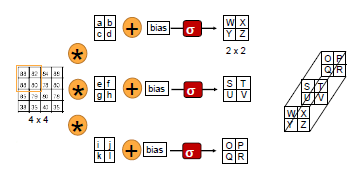

The size 148X148X64 is very huge therefore after every convolution we have pooling. Pooling says that i know that there still a lot of noise in the 64 images and tries to remove it. Again here it takes a filter and stride, but applies a different function and runs over the image. Here filter size = stride size, since our objective is to loose noise here. The applied function can be any one of the 3 - max : get the max value from the filter area, sum : get the sum of the filter area, avg : get the average of the filter area. Normally max function is used, since it keeps the sinny part of the image. For example for the 148X148X64 features, if apply a filter and stride of size 2X2, the pooling output feature size will become 74X74X64. Similary if we take filter and stride of size 3X3, the image size becomes a third. Even after pooling the image will be intack, it has similar effect as picking up alternate lines vertically and horizantally and srinking the image size by 2. 

This one pair of convolution and pooling is called a chunk. Multiple layers of chunks are applied. Once you are satisfied that you have enough features you send it to a FCNN to do the categorization. We can mix up the architecture, these are all hyper parameters. We can use con->pool->con->poll...or we can use con->con->pool->con->con->pool... etc. Technically we are converting catsvsdogs images into MNIST kind of images during the entire convolution then passing these images to FCNN.

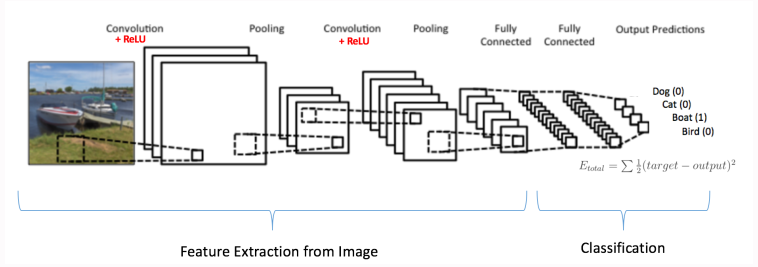

The image transformation over the entire model is as below.
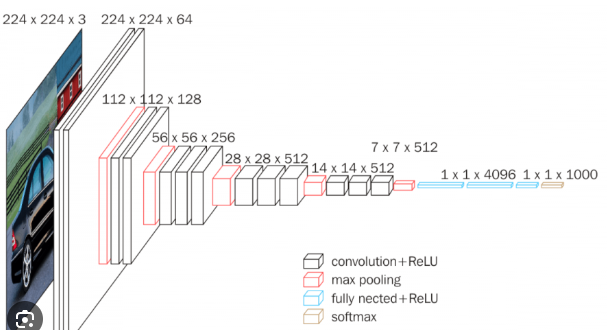